# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing dataframe
path = r"C:\Users\User\Downloads\df_cleaned.csv"

In [4]:
# Load the data into a DataFrame
df_cleaned = pd.read_csv(path)

# Data cleaning

In [5]:
df_cleaned.head()

,incident_id,date,state,n_killed,n_injured,gun_stolen,gun_type,n_guns_involved,n_victims,n_suspects
0,461105,2013-01-01,Pennsylvania,0,4,Unknown,Unknown,0.0,4,1
1,460726,2013-01-01,California,1,3,Unknown,Unknown,0.0,4,1
2,478855,2013-01-01,Ohio,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2.0,3,2
3,478925,2013-01-05,Colorado,4,0,Unknown,Unknown,0.0,3,1
4,478959,2013-01-07,North Carolina,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2.0,3,1


In [6]:
df_cleaned.shape

(239677, 10)

In [7]:
df_cleaned.describe()

,incident_id,n_killed,n_injured,n_guns_involved,n_victims,n_suspects
count,2.396770e+05,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000
mean,5.593343e+05,0.252290,0.494007,0.802964,0.805501,0.831381
std,2.931287e+05,0.521779,0.729952,3.641656,0.839808,0.974121
min,9.211400e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.085450e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.435870e+05,0.000000,0.000000,1.000000,1.000000,1.000000
75%,8.172280e+05,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.083472e+06,50.000000,53.000000,400.000000,102.000000,63.000000


In [8]:
# Check for missing values
df_cleaned.isnull().sum()      

incident_id        0
date               0
state              0
n_killed           0
n_injured          0
gun_stolen         0
gun_type           0
n_guns_involved    0
n_victims          0
n_suspects         0
dtype: int64

In [11]:
# Check for duplicates and remove them
df_cleaned = df_cleaned.drop_duplicates()

# Data prep for regression analysis

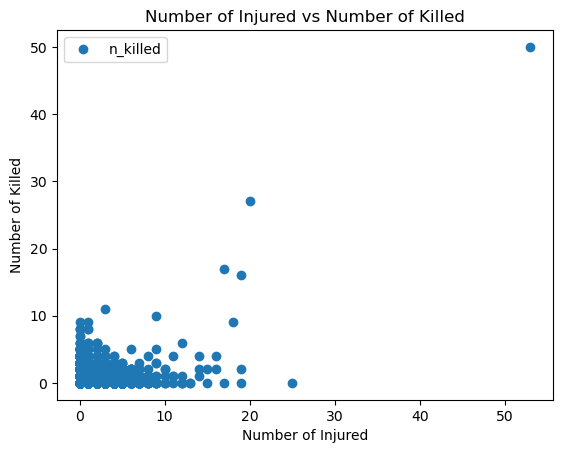

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_cleaned.plot(x='n_injured', y='n_killed', style='o')  # Replace 'n_injured' and 'n_killed' with your chosen variables
plt.title('Number of Injured vs Number of Killed')        # Adjust title as per variables
plt.xlabel('Number of Injured')
plt.ylabel('Number of Killed')
plt.show()

# Hypothesis

"States with stricter gun control laws have significantly lower rates of gun violence compared to states with more lenient laws, after accounting for population size and socioeconomic factors."

In [13]:
# Reshaping the variables into NumPy arrays and put them into separate objects.
X = df_cleaned['n_injured'].values.reshape(-1, 1)  # Independent variable
y = df_cleaned['n_killed'].values.reshape(-1, 1)   # Dependent variable

In [15]:
"Shape of X:", X.shape

('Shape of X:', (239677, 1))

In [16]:
"Shape of y:", y.shape

('Shape of y:', (239677, 1))

In [17]:
# Spliting data into 2 set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Analysis

In [18]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict y values for the test set
y_pred = model.predict(X_test)

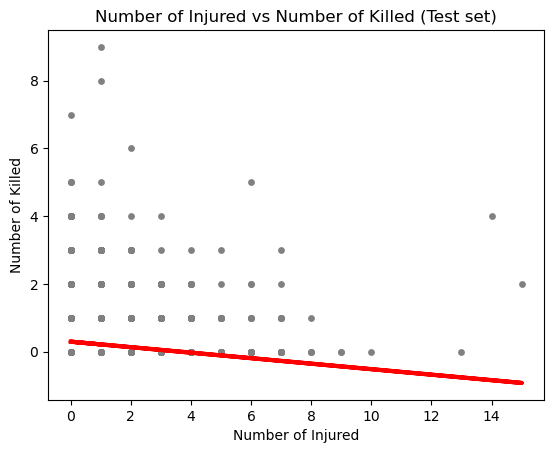

In [23]:
# Create a plot that shows the regression line from the model on the test set.
plt.scatter(X_test, y_test, color='grey', s=15)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Number of Injured vs Number of Killed (Test set)')
plt.xlabel('Number of Injured')
plt.ylabel('Number of Killed')
plt.show()

The regression line shown in the plot appears to have a poor fit to the data. The scatter points representing the actual values show significant dispersion and variability, with many points far from the regression line. This indicates that the linear model does not adequately capture the relationship between the number of injured and the number of killed in the test set. The negative slope of the line also suggests an inverse relationship, which may not align well with the clustering of points, particularly around lower values of both variables. This mismatch suggests the need for further exploration, such as using non-linear models or checking data assumptions, to improve predictive performance

In [30]:
# Creating objects that contain the model summary statistics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate R2 Score

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.25
R² Score: 0.03


In [31]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test.flatten() if hasattr(y_test, 'flatten') else y_test,
    'Predicted': y_pred.flatten() if hasattr(y_pred, 'flatten') else y_pred
})

In [32]:
# Display the first few rows of the DataFrame
print(comparison_df.head())

   Actual  Predicted
0       0   0.211283
1       1   0.292545
2       0   0.211283
3       0   0.292545
4       1   0.292545


The model's performance on the test set appears to be suboptimal, as suggested by the comparison of actual and predicted values. The predicted values are relatively close to each other, with limited variability, failing to accurately capture the full range of actual values, which include both 0 and 1. This lack of variability indicates that the model struggles to differentiate between cases effectively and may be underfitting the data. The predictions, while not entirely random, do not align closely with the actual outcomes, suggesting that the model may benefit from additional tuning, feature engineering, or consideration of a more complex model to better capture the underlying patterns in the data

# Include any reflections you have on the impact of possible data bias

Data bias can significantly impact the model's performance and generalizability. If the dataset is imbalanced—such as having a disproportionate number of instances with low or zero values for the target variable—this could lead the model to favor those outcomes and fail to predict higher values accurately. Bias in the features or their distributions might also result in the model overlooking important relationships or amplifying irrelevant patterns. To address this, it's crucial to investigate the data for potential biases, apply techniques like resampling or weighting, and ensure that the model is trained on a representative dataset that captures the diversity of real-world scenarios.